## **IMPORT DATA DAN LIBRARY**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **EXPLORASI DATA**

In [ ]:
#upload dan read data
data = pd.read_csv('/content/drive/MyDrive/DATASETCSV/dataset-saun.csv')
data.head()

In [ ]:
#untuk mengetahui jumlah data dan atribut
data.shape,data.columns

((2000, 18),
 Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
        'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'genre'],
       dtype='object'))

In [ ]:
#mencari nilai null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


## **VISUALISASI DATA**

In [ ]:
#mencari banyaknya lagu di setiap tahun
songs_per_years = data['year'].value_counts().sort_index()

iplot(px.bar(songs_per_years, 
       title='Number of songs per year', 
       text_auto='.2s',
       labels=dict(index='year',value='number of songs'),
       color_discrete_sequence=['#1DB954']
      ).update_xaxes(type='category'))

In [ ]:
#mencari data artis teratas
artists = data['artist'].value_counts()
artists

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: artist, Length: 835, dtype: int64

In [ ]:
iplot(px.pie(values=[artists[:50].sum(),2000-artists[:50].sum()], 
       names=['top 50 artists',f'remaining {835-50} artists'], 
       title="banyaknya lagu yang dimiliki oleh 50 artis teratas",
       color_discrete_sequence = ['mediumpurple', 'moccasin']
      ).update_traces(textinfo='value+percent'))

In [ ]:
artist_df = data[['artist', 'popularity']].groupby('artist').mean().sort_values(by='artist')
artists = artists.sort_index()
artist_df['total songs'] = artists.values
artist_df.sort_values(by='total songs',ascending=False, inplace=True)
artist_df.reset_index(inplace=True)
artist_df[:10]

iplot(px.scatter(artist_df[:10], 
           x='artist', 
           y='popularity', 
           size='total songs',
           size_max=40,
           color='popularity',
           title='top 10 artis vs rata-rata popularitas dari artis papan atas',
           hover_name='total songs'
          ))


## **VISUALISASI KEMUNGKINAN ADANYA CLUSTER**

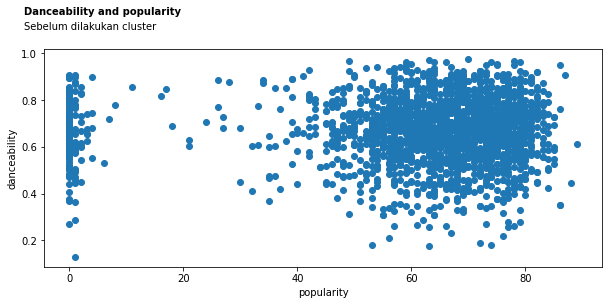

In [ ]:
#adalah gambaran hubungan antara danceability dan popularity 
fig,ax=plt.subplots(figsize=(10,4))

x_ = data['popularity']
y_ = data['danceability']
fig.text(0.097,1,'Danceability and popularity',fontweight='bold')
fig.text(0.097,0.95,'Sebelum dilakukan cluster',fontweight='light')
label = data ['year']
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.scatter(x_,y_,cmap='plasma')

In [ ]:
#melihat hubungan antar atribut serta mendeklarasikan variabel
x = data[['popularity','danceability']]
x.head()

,popularity,danceability
0,77,0.751
1,79,0.434
2,66,0.529
3,78,0.551
4,65,0.614


In [ ]:
#menentukan jumlah k paling optimal 
wcss = []
index = range(1,10)

for i in index:
  kmeans = KMeans(n_clusters=i,random_state=30)
  kmeans.fit(x)
  wcss_ = kmeans.inertia_
  wcss.append(wcss_)
  print(i,wcss_)

1 909997.9013221891
2 194380.39739078627
3 69811.11980066934
4 38398.689795139406
5 23521.209275262703
6 16861.78379492528
7 12170.97683453607
8 8946.076414717529
9 7316.811242315172


<function matplotlib.pyplot.show>

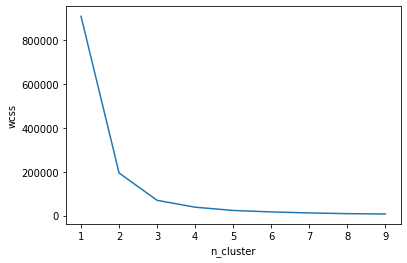

In [ ]:
plt.plot(index,wcss)
plt.xlabel('n_cluster')
plt.ylabel('wcss')
plt.show

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2,3,4]
for i in range_n_clusters :
  clusterer = KMeans (n_clusters=i ,init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0)
  y_means = clusterer.fit_predict(x)
  silhouette_avg = silhouette_score(x,y_means)

  print("jumlah klaster = ",i,"nilai rata2 silhouette =",silhouette_avg
        )


jumlah klaster =  2 nilai rata2 silhouette = 0.8158628244886904
jumlah klaster =  3 nilai rata2 silhouette = 0.6103613957567725
jumlah klaster =  4 nilai rata2 silhouette = 0.5835692933275375


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x[:5]

array([[ 0.74413046,  0.59525376],
       [ 1.15668497, -1.66288167],
       [-1.46925722, -0.98615338],
       [ 1.26146072, -0.82943736],
       [ 1.35968798, -0.38065966]])

In [ ]:
#assign hasil cluster
selected_cols = ["popularity","danceability"]
cluster_data = data.loc[:,selected_cols]

kmeans_sel = KMeans(n_clusters = 2,random_state=0).fit(x)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)
clustered_data

,popularity,danceability,Cluster
0,77,0.751,0
1,79,0.434,0
2,66,0.529,0
3,78,0.551,0
4,65,0.614,0
...,...,...,...
1995,79,0.842,0
1996,78,0.552,0
1997,69,0.847,0
1998,75,0.741,0


## **VISUALISASI CLUSTER**

In [ ]:
kmeans = KMeans(n_clusters = 2 ,random_state = 30)
kmeans.fit(x)

KMeans(n_clusters=2, random_state=30)

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

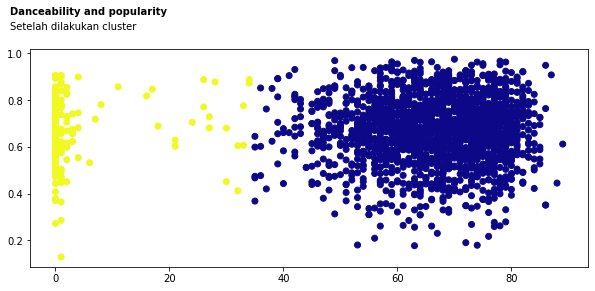

In [ ]:
fig,ax=plt.subplots(figsize=(10,4))

x_ = data['popularity']
y_ = data['danceability']
fig.text(0.097,1,'Danceability and popularity',fontweight='bold')
fig.text(0.097,0.95,'Setelah dilakukan cluster',fontweight='light')

label = kmeans.labels_
plt.scatter(x_,y_,c= label,cmap='plasma')